<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Patricio Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Samuel Molina Bustos

### **Link de repositorio de GitHub:** `https://github.com/samumolina/evaluaciones_mds7202`


## Reglas:

- Fecha de entrega: 22/10/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [3]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head(20)

Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5   489434     22064           PINK DOUGHNUT TRINKET POT         24   
6   489434     21871                  SAVE THE PLANET MUG        24   
7   489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8   489435     22350                            CAT BOWL         12   
9   489435     22349       DOG BOWL , CHASING BALL DESIGN        12   
10  489435     22195         HEART MEASURING SPOONS LARGE        24   
11  489435     22353   LUNCHBOX WITH CUTLERY FAIRY CAKES         12   
12  489436    48173C                DOOR MAT BLACK FLOCK         10   
13  489436     21755             LOVE BUILDING BLOCK WORD        18   
14  489436     21754             HOME BUILDING BLOCK WORD         3   
15  489436     84879        ASSORTED COLOUR BIRD ORNAMENT        16   
16  489436     22119           PEACE WOODEN BLOCK LETTERS         3   
17  489436     22142         CHRISTMAS CRAFT WHITE FAIRY         12   
18  489436     22296            HEART IVORY TRELLIS LARGE        12   
19  489436     22295            HEART FILIGREE DOVE LARGE        12   

           InvoiceDate  Price Customer ID         Country  
0  2009-12-01 07:45:00   6.95     13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10     13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25     13085.0  United Kingdom  
5  2009-12-01 07:45:00   1.65     13085.0  United Kingdom  
6  2009-12-01 07:45:00   1.25     13085.0  United Kingdom  
7  2009-12-01 07:45:00   5.95     13085.0  United Kingdom  
8  2009-12-01 07:46:00   2.55     13085.0  United Kingdom  
9  2009-12-01 07:46:00   3.75     13085.0  United Kingdom  
10 2009-12-01 07:46:00   1.65     13085.0  United Kingdom  
11 2009-12-01 07:46:00   2.55     13085.0  United Kingdom  
12 2009-12-01 09:06:00   5.95     13078.0  United Kingdom  
13 2009-12-01 09:06:00   5.45     13078.0  United Kingdom  
14 2009-12-01 09:06:00   5.95     13078.0  United Kingdom  
15 2009-12-01 09:06:00   1.69     13078.0  United Kingdom  
16 2009-12-01 09:06:00   6.95     13078.0  United Kingdom  
17 2009-12-01 09:06:00   1.45     13078.0  United Kingdom  
18 2009-12-01 09:06:00   1.65     13078.0  United Kingdom  
19 2009-12-01 09:06:00   1.65     13078.0  United Kingdom

In [4]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ MB


In [5]:
df_retail.shape

(525461, 8)

El dataset contiene 525461 instancias (muestras o filas) y 8 atributos (columnas). Las columnas son:
* **Invoice** correspondería a factura en español y es una tipo de dato categórico. 
* **StockCode** también es categórico y haría alusión a un código de producto quizás. 
* **Description** contiene la descripción del producto y este atributo es de tipo string.
* **Quantity** podría corresponder a la cantidad del producto vendido y es de tipo entero (int64).
* **InvoiceDate** sería la fecha de la factura y es de tipo datetime.
* **Price** corresponde al precio del producto y es de tipo float.
* **Customer ID** es el identificador del cliente, también de tipo categórico.
* **Country** evidentemente es el país y es de tipo string. 

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

* El análisis univariable corresponde a estudiar por separado una variable. Este análisis permite descubrir patrones a través de estadísticas de resumen y análisis de distribución de los datos para conocer cuán relevante es la variable.

* El análisis multivariable, por otro lado, permite estudiar cómo se comporta una variable con respecto a las otras para conocer las relaciones entre las distintas variables.

* El análisis de datos faltantes permite conocer si existen un patrón que los determina y de esta forma poder elegir un adecuado tratamiento de estos.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [6]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

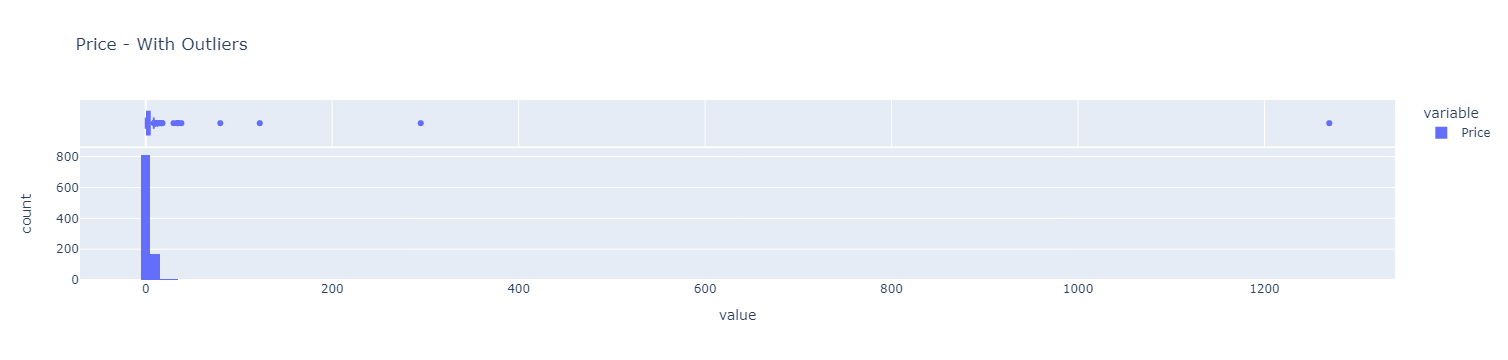

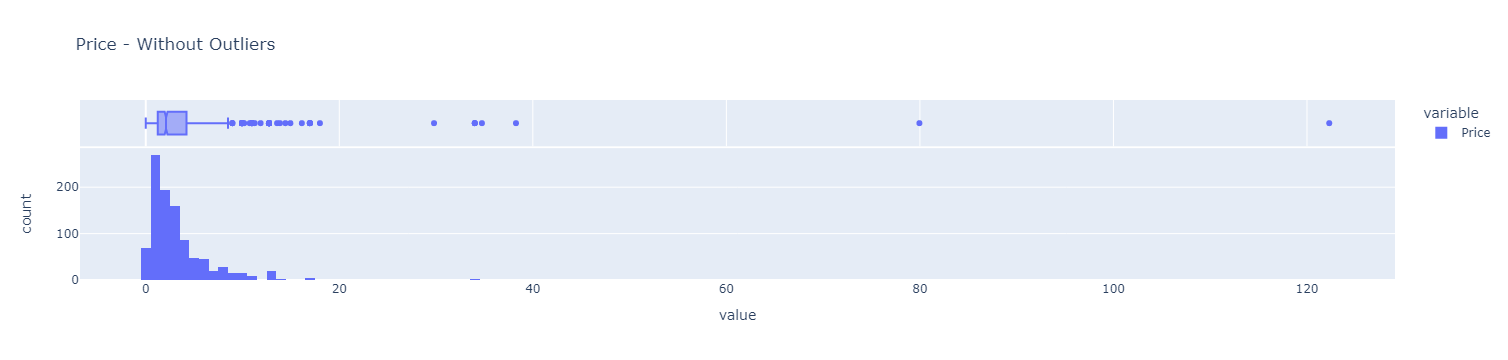

In [7]:
profile_serie(df_retail['Price']) 

    De las estadísticas descriptivas se puede mencionar que esta variable es del tipo flotante, que no tiene datos faltantes y que el 99% de los datos están duplicados. En relación a los números relevantes, se observa que en los precios hay un valor mínimo negativo de -53594.36, un valor máximo de 25111.09; pero el promedio es 4.68 por lo que tanto mínimo como máximo podrían ser outliers. De hecho se aprecia en el perfil que existen 3 valores negativos, los cuales también deberían ser outliers. La dispersión en los datos es alta con un std de 146 aprox. Se tiene una skewness negativa y una curtosis del tipo leptocúrtica. Adicionalmente se tienen 3687 valores 0, lo que corresponde al 0.7% de los datos. Esta serie ocupa 4203816 bytes de memoria.
    
    De los gráficos podemos observar, en primer lugar, que se tienen muchos outliers. Al eliminar algunos de estos datos outliers se puede ver dónde se concentran los valores, esto es en entre 1 y 5 aproximadamente. De acuerdo al box plot se puede observar que la mediana de los datos es 2.1.
    

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

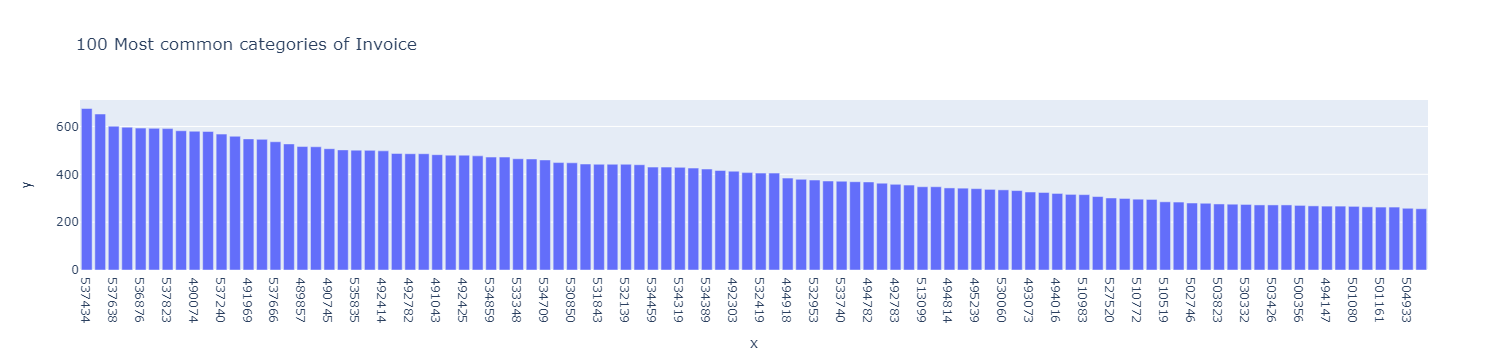

In [8]:
profile_serie(df_retail['Invoice'])

    Invoice es una variable categórica que mucha información como tal, quizás no entrega. No obstante, de acuerdo a los resultados anteriores, se puede decir que esta variable no contiene datos nulos y que cerca del 98% de los datos están duplicados. Contiene 28816 valores únicos. Esta serie ocupa 2338386 bytes de memoria y el dato más frecuente, viendo el gráfico, es el invoice 53743 con 675 apariciones. 

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

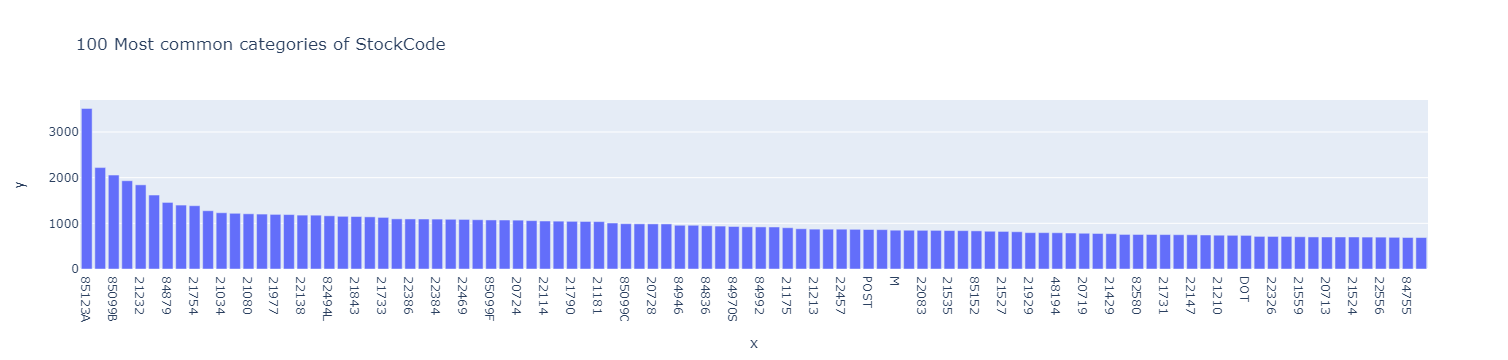

In [9]:
profile_serie(df_retail['StockCode'])

    StockCode también es una variable categórica, no contiene datos nulos y casi el 100% de los datos están duplicados. Contiene 4632 valores únicos. Ocupa 1220242 bytes de memoria y el StockCode más repetido, con 3516, es el 85123A; cerca de un 60% más de apariciones que el código que le sigue.
    
    Una particularidad que se observa en el gráfico es la existencia de dos StockCodes muy distintos al resto: POST y M. 

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

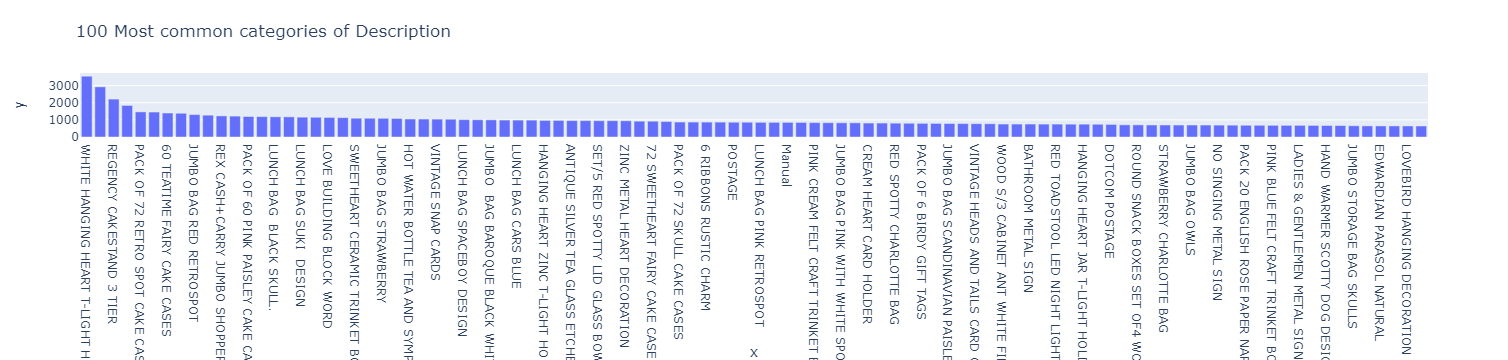

In [10]:
profile_serie(df_retail['Description'])

    Description es una variable de tipo objeto, particularmente string. De acuerdo al Description Profile, no contiene datos nulos y casi el 100% de los datos están duplicados. Contiene 4682 valores únicos. Ocupa 4203816 bytes de memoria. 
    
    Mirando el gráfico se observa que la descripciones más repetidas es *WHITE HANGING HEART T-LIGHT HOLDER* con 3549 apariciones y, curiosamente, se observa que la segunda descripción más repetida es **nan** con 2928 apariciones. Es decir, 2928 datos tratados como nan al no contar con su descripción.

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

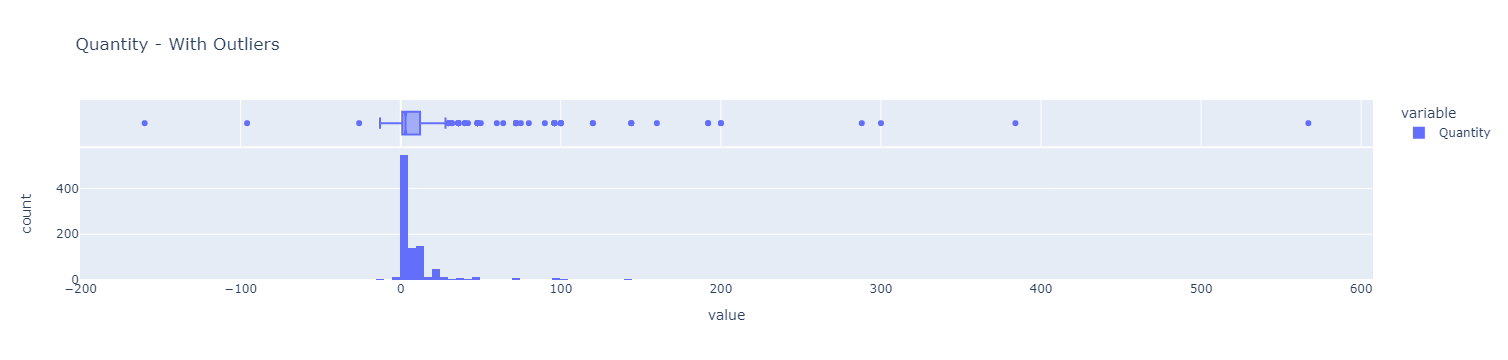

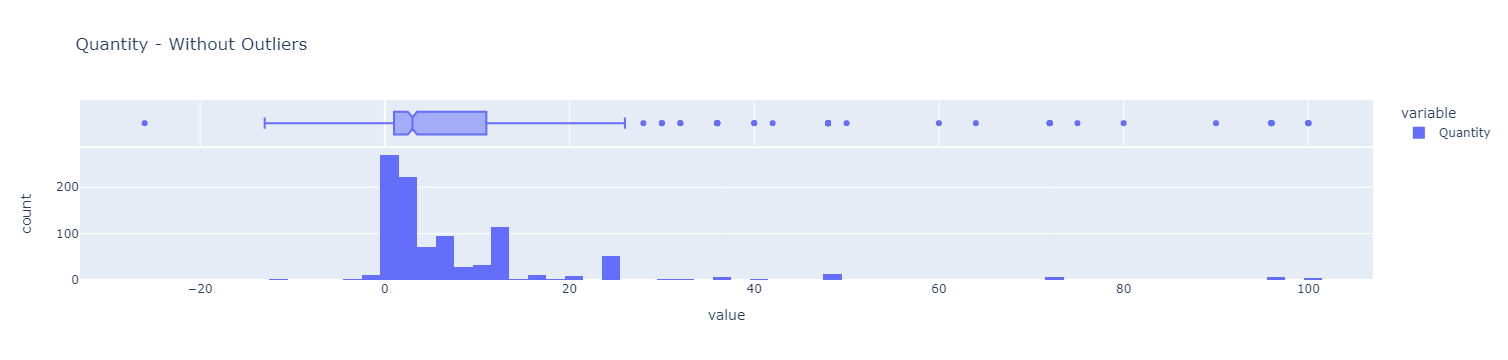

In [11]:
profile_serie(df_retail['Quantity'])

    De las estadísticas descriptivas se puede mencionar que esta variable es del tipo entero, que no tiene datos faltantes y que cerca del 100% de los datos están duplicados. En relación a los números relevantes, se observa que el valor mínimo es -9600 y el valor máximo es 19152. El promedio de los datos es 10.34. La dispersión en los datos es alta con un std de 107 aprox. Se tiene una skewness postiva y una curtosis del tipo leptocúrtica. Adicionalmente se tienen 12326 datos negativos los cuales representan un 2.35% de los datos. Esta serie ocupa 4203816 bytes de memoria.
    
    De los gráficos podemos observar, en primer lugar, que se tienen outliers tanto de valores positivos como de valores negativos. Al eliminar algunos de estos datos outliers se puede ver dónde se concentran los valores, esto es en entre -1 y 13 aproximadamente. De acuerdo al box plot se puede observar que la mediana de los datos es 3.

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

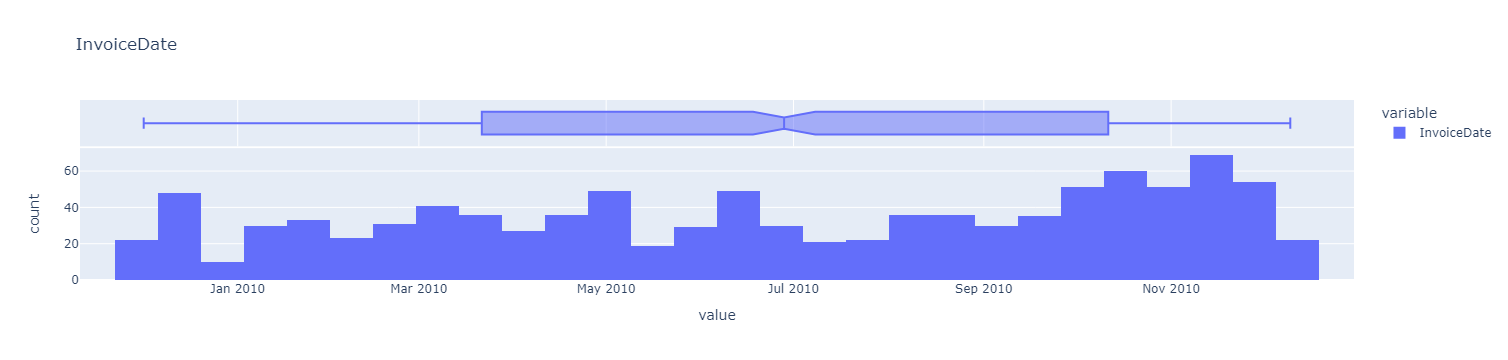

In [12]:
profile_serie(df_retail['InvoiceDate'])

    La variable InvoiceDate es del tipo datetime, es decir son fechas. Debido a esto los cómputos númericos no hacen mucho sentido. Se puede mencionar que no hay datos nulos y que el 99.04% de los datos están duplicados (fechas repetidas).
    
    Del gráfico lo único que se podría mencionar es que el rango que contiene fechas que más aparecen es entre el 7 y el 20 de Nov de 2010 con 69 valores. Con apenas 10 valores, el rango con menor cantidad de datos es entre el 20 de Dic de 2009 y el 2 de Ene de 2010.

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

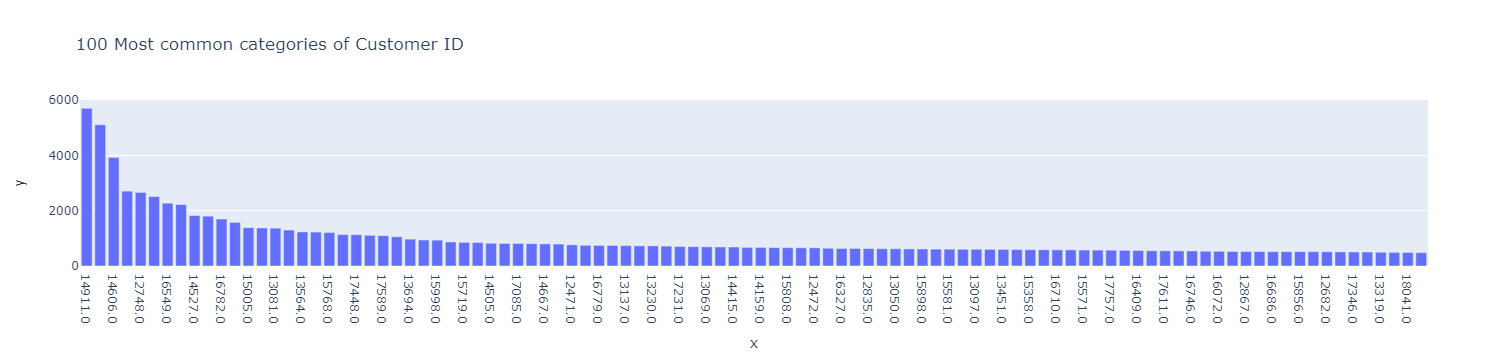

In [13]:
profile_serie(df_retail['Customer ID'])

    Customer ID es una variable categórica. En esta variable se tienen 107927 valores nulos, el 20.54% de los datos. De los datos no nulos, casi el 100% están duplicados. Contiene 4383 valores únicos. Ocupa 1218250 bytes de memoria.
    
    Los dos Customer ID más repetidos son 14911 y 14606 con 5710 y 5114 apariciones respectivamente.

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

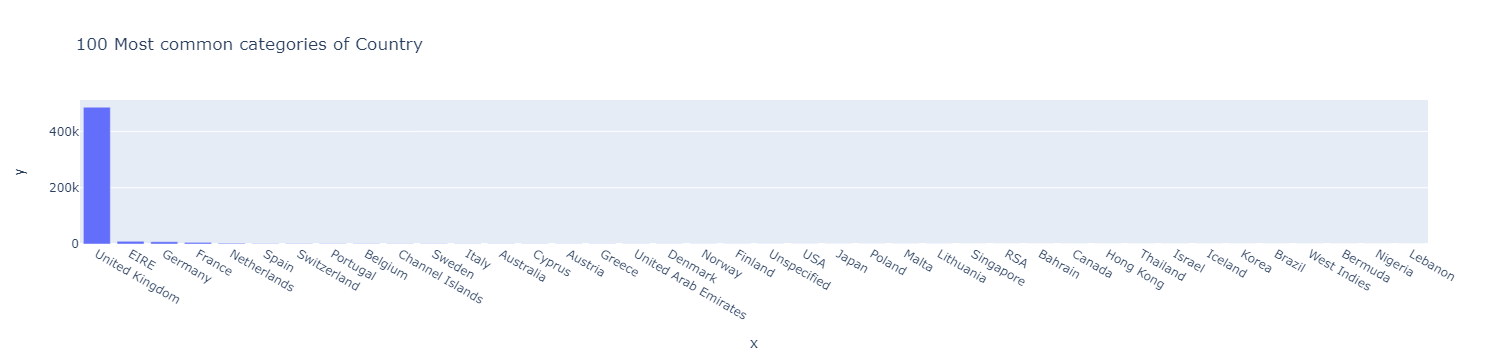

In [14]:
profile_serie(df_retail['Country'])

    Country es una variable de tipo objeto, particularmente string. De acuerdo a su perfil, no contiene datos nulos y el 100% de los datos están duplicados. Contiene 40 datos únicos. Ocupa 4203816 bytes de memoria. 
    
    El país más repetido es United Kingdom con 485852 apariciones. Le sigue EIRE, muy por debajo, con 9670 apariciones.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [15]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

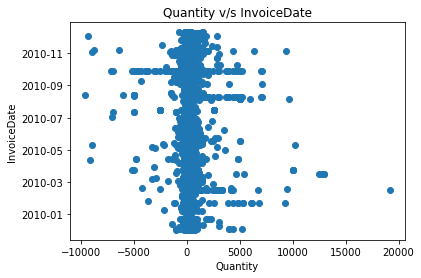

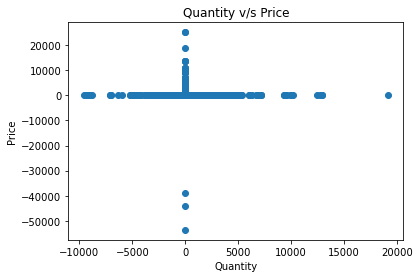

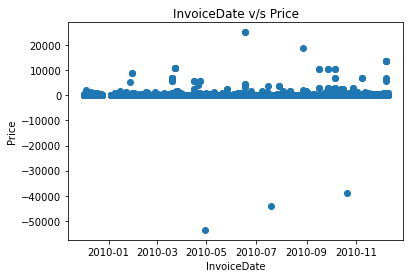

## Correlation:

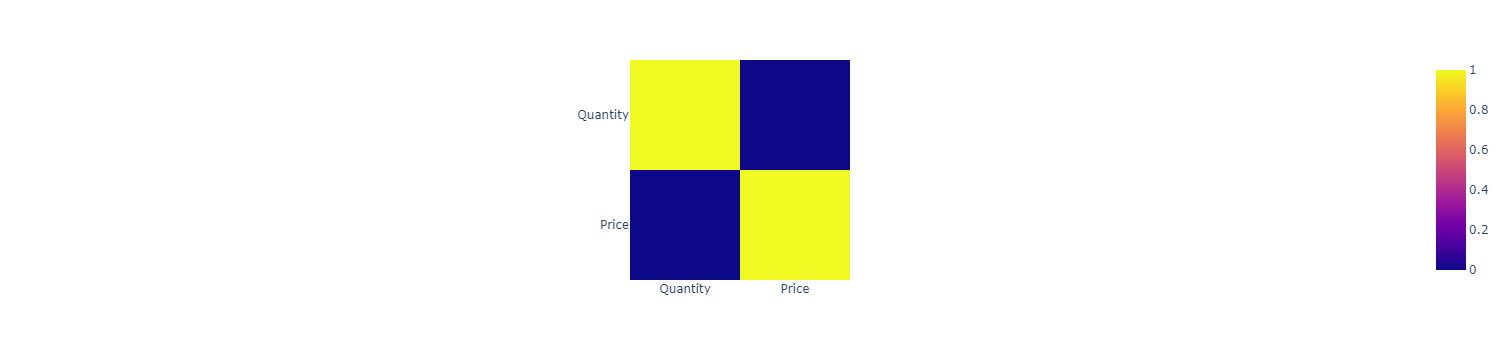

## Missing Matrix:

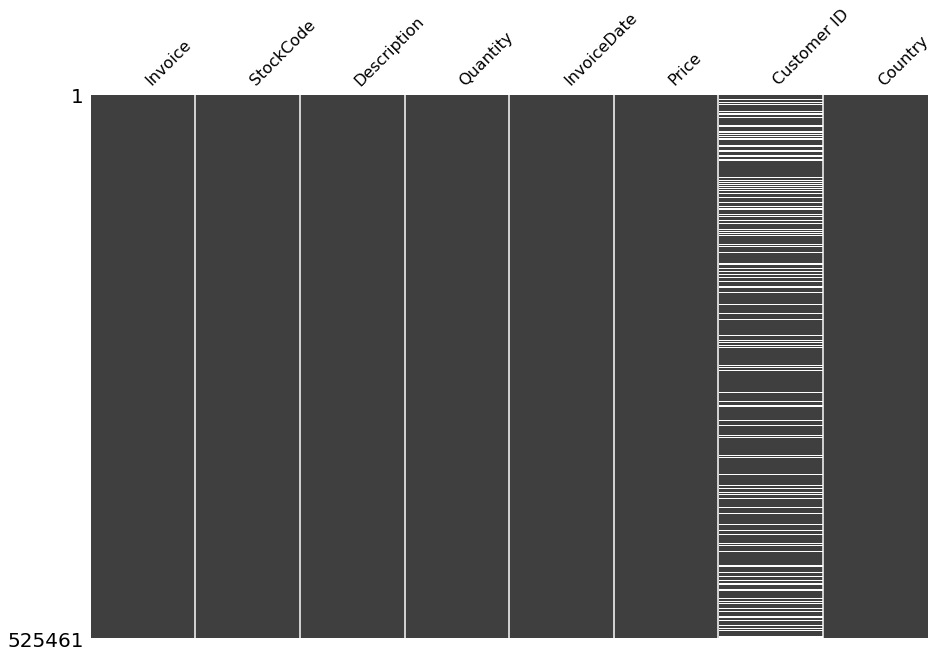

In [16]:
profile_df(df_retail)

    Del análisis bivariado entre Quantity e Invoice Date se puede mencionar una concentración en torno al 0 para todas las fechas, esto quiere decir que la cantidad de productos comprados y el precio no varió a lo largo del tiempo. En el caso de Quantity vs Price se distingue una baja relación entre las variables y que productos más caros fueron comprados en menor cantidad. Finalmente, en InvoiceDate vs Price, ocurre algo similar al primer caso.
    
    De acuerdo a la matriz de correlación, se puede ver que hay una correlación negativa entre las variables Price y Quantity muy cercana a 0. No obstante, se podría suponer que productos más caros, se compran menos; por ejemplo.
    
    En cuanto a la matriz de datos faltantes, destaca de sobre manera la cantidad de datos nulos para el atributo Customer ID.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [17]:
def clean_data(dataframe):
    ''' función recibe dataframe y devuelve dataframe limpio '''
    df_clean = dataframe.copy()
    
    # Valores faltantes en Costumer ID
    # df_clean["Customer ID"] = df_clean["Customer ID"].astype(float).fillna('-').astype("category")

    # Valores nan en Description
    # df_clean.loc[df_clean["Description"] == "nan", "Description"] = "Manual"
    
    # Solo valores mayores que 0 en variables númericas
    for attribute in ["Price","Quantity"]:
        df_clean = df_clean[df_clean[attribute] > 0]
    
    # Elimina filas con nan
    df_clean = df_clean.dropna()
    
    # Elimina duplicados
    df_clean = df_clean.drop_duplicates()
        
    return df_clean        

## Invoice Profile

Type                           category
Number of observations           400916
Unique                            19213
Top                              500356
Freq                                251
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   399186
Duplicate rows (%)              99.57 %
Total size in memory      5296496 bytes
dtype: object

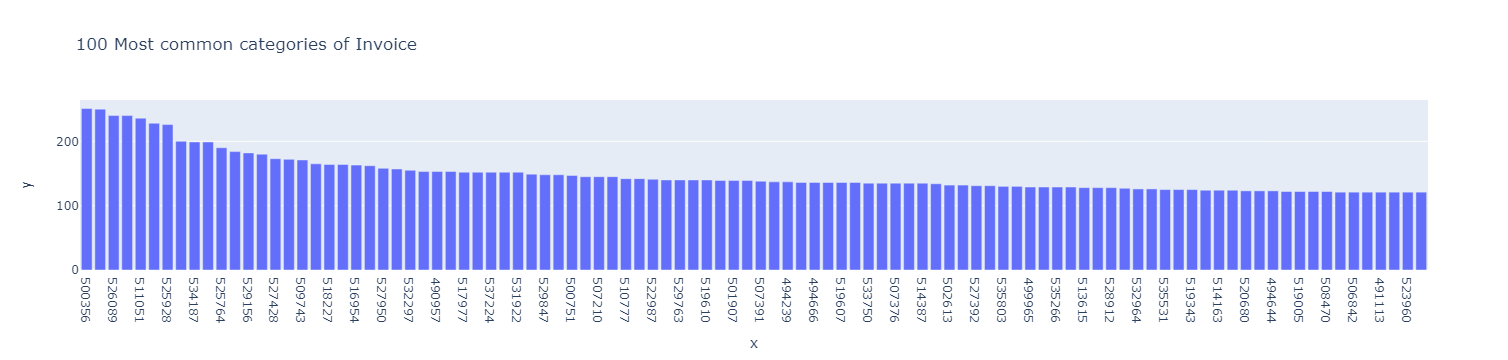

## StockCode Profile

Type                           category
Number of observations           400916
Unique                             4017
Top                              85123A
Freq                               3107
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400754
Duplicate rows (%)              99.96 %
Total size in memory      4178352 bytes
dtype: object

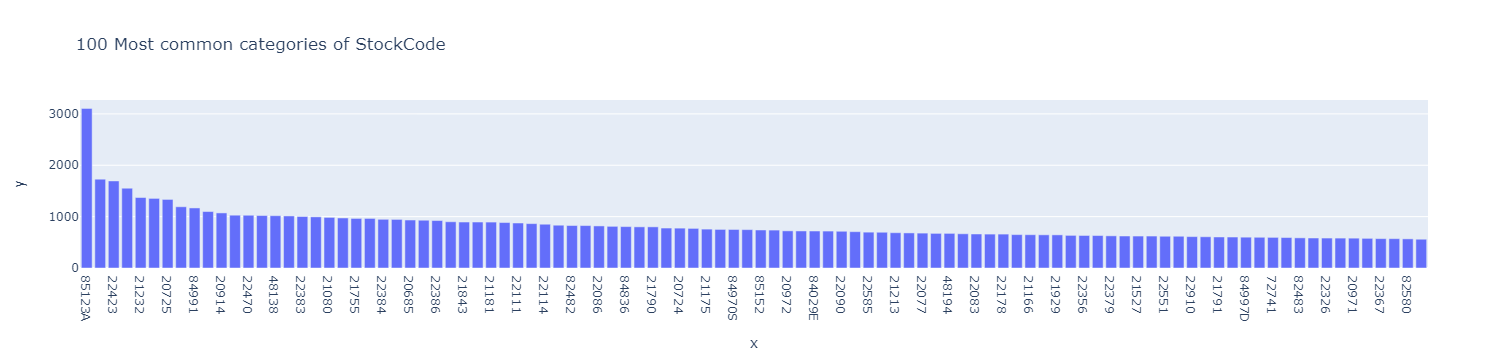

## Description Profile

Type                                                  object
Number of observations                                400916
Unique                                                  4444
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3107
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        400710
Duplicate rows (%)                                   99.95 %
Total size in memory                           6414656 bytes
dtype: object

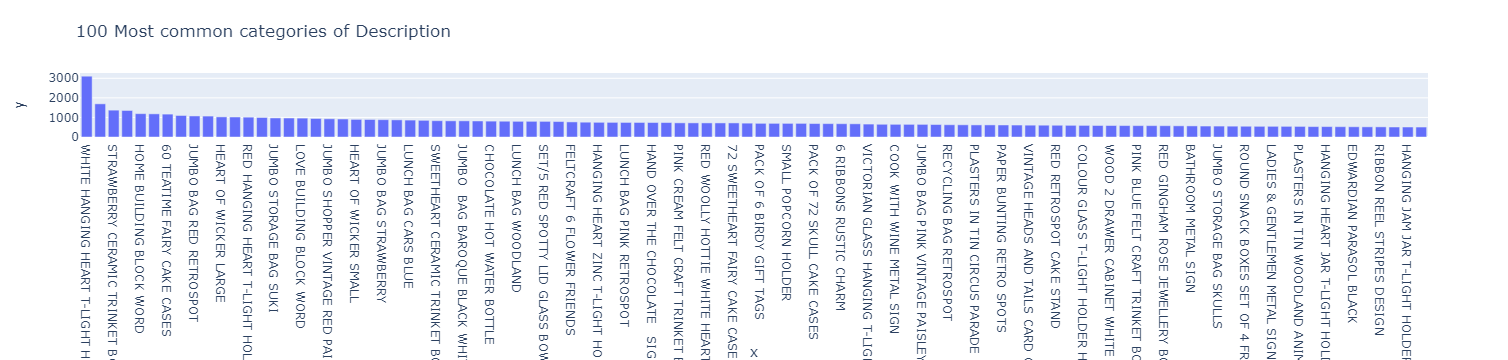

## Quantity Profile

Type                              int64
Number of observations         400916.0
Mean                          13.767418
Std                           97.638385
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        9418.363882
Skew                          79.281875
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400802
Duplicate rows (%)              99.97 %
Total size in memory      6414656 bytes
dtype: object

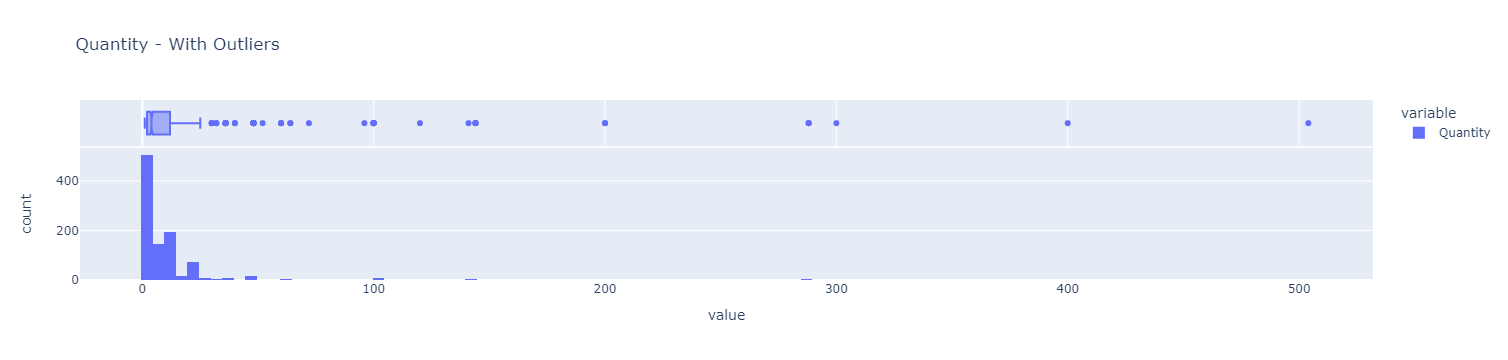

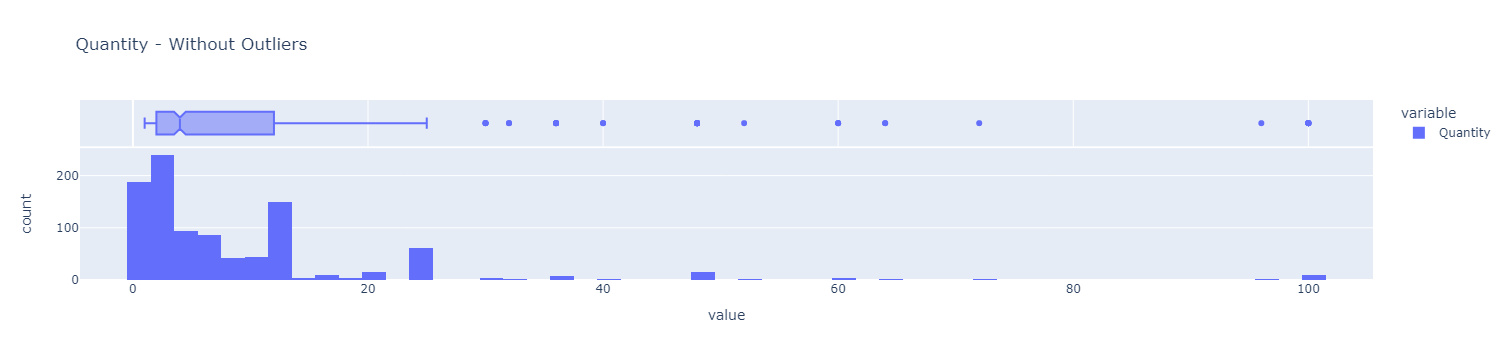

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           400916
Mean                      2010-07-01 05:01:16.167027712
Min                                 2009-12-01 07:45:00
25%                                 2010-03-26 13:28:00
50%                                 2010-07-09 10:26:00
75%                                 2010-10-14 13:58:45
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   399449
Duplicate rows (%)                              99.63 %
Total size in memory                      6414656 bytes
dtype: object

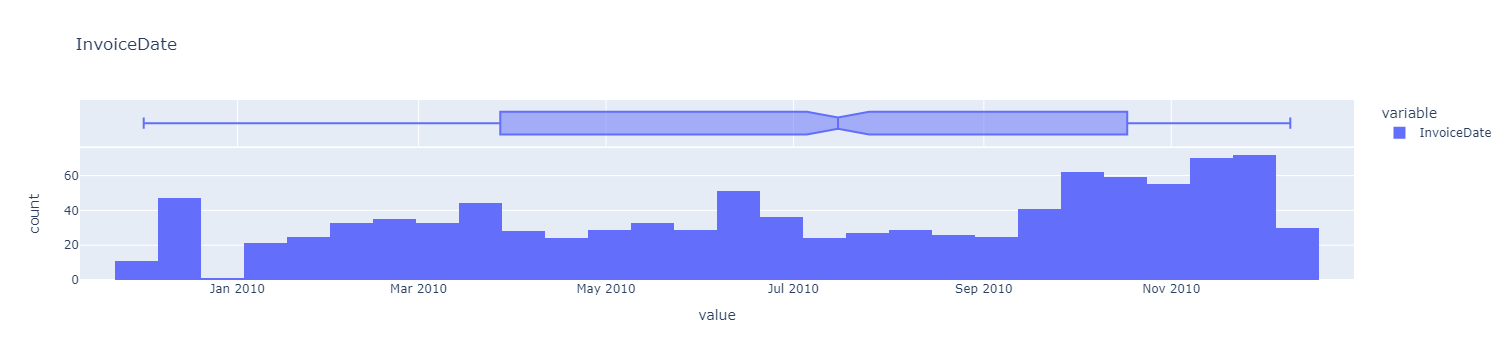

## Price Profile

Type                            float64
Number of observations         400916.0
Mean                           3.305826
Std                           35.047719
Min                               0.001
25%                                1.25
50%                                1.95
75%                                3.75
Max                             10953.5
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       62818.874688
Skew                         233.142978
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400730
Duplicate rows (%)              99.95 %
Total size in memory      6414656 bytes
dtype: object

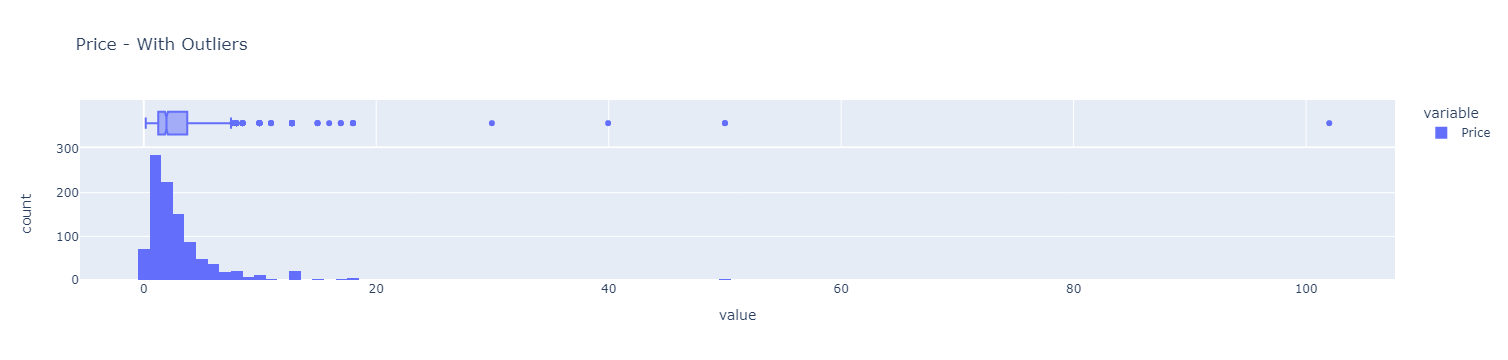

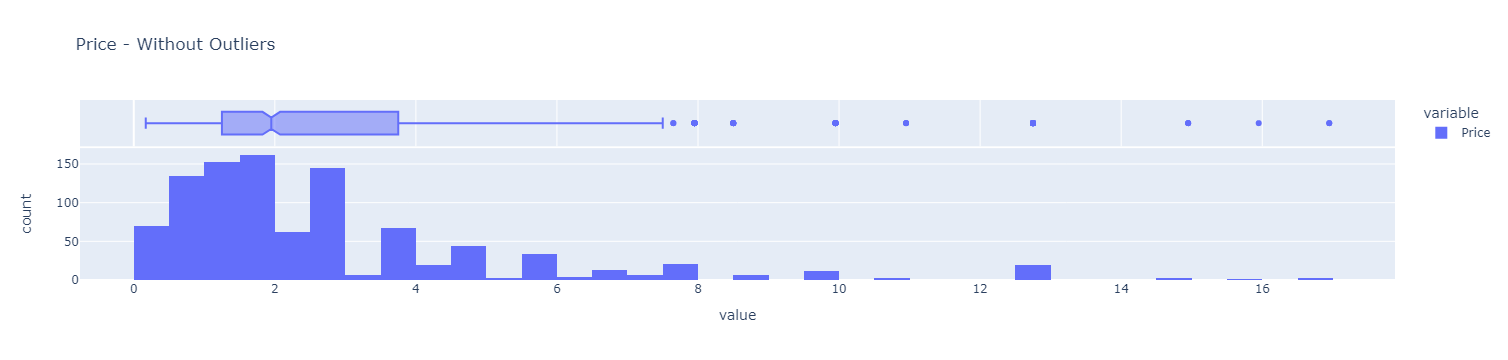

## Customer ID Profile

Type                           category
Number of observations         400916.0
Unique                           4312.0
Top                             14911.0
Freq                             5568.0
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400825
Duplicate rows (%)              99.98 %
Total size in memory      4176360 bytes
dtype: object

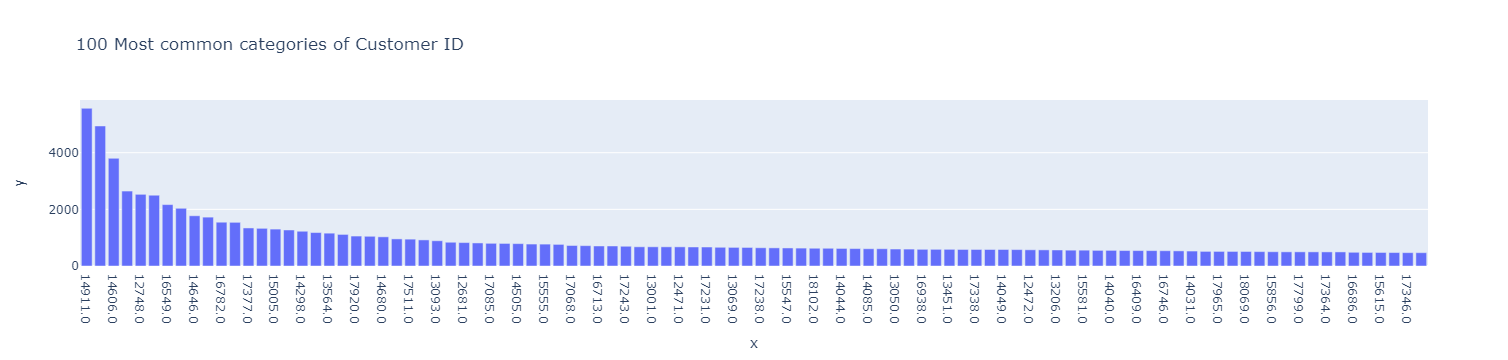

## Country Profile

Type                              object
Number of observations            400916
Unique                                37
Top                       United Kingdom
Freq                              364233
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    400916
Duplicate rows (%)               100.0 %
Total size in memory       6414656 bytes
dtype: object

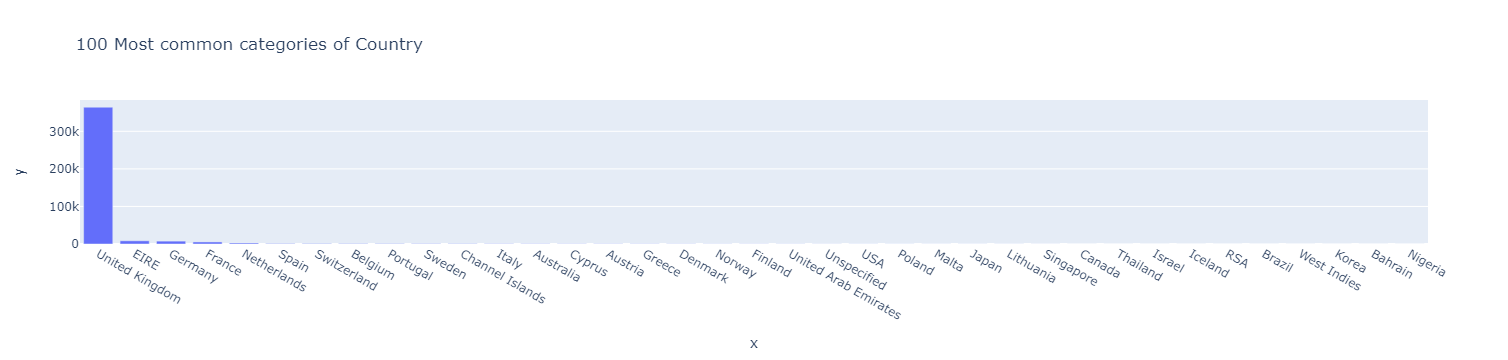

In [18]:
#Análisis univariado
df_retail_clean = clean_data(df_retail)

for columna in df_retail_clean.columns:
    profile_serie(df_retail_clean[columna]) 

    Las principales diferencias del análisis univariado están obviamente en primer lugar con las variables númericas Price y Quantity ya no se aprecian valores negativos ni zeros.
    
    La variable Description cambió su top de elementos comunes. Se mantuvo el primero, pero en los siguientes de ven cambios respecto al análisis inicial. Y ya no aparecen los nan, que anteriormente ocupaban el segundo lugar.
    
    En StockCode ya no se aprecia POST ni M advertidos en el análisis inicial.

## Bivariant Analysis:

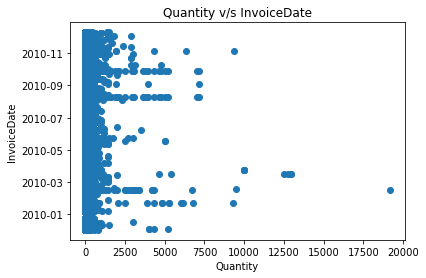

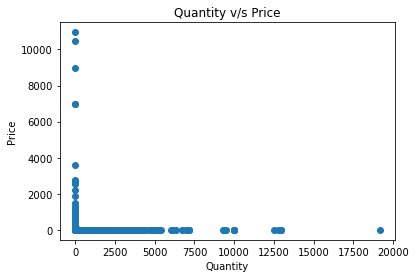

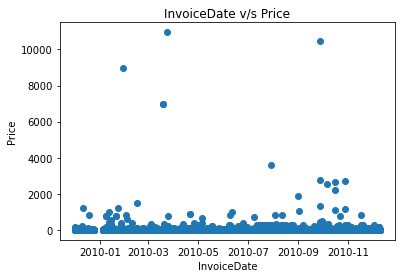

## Correlation:

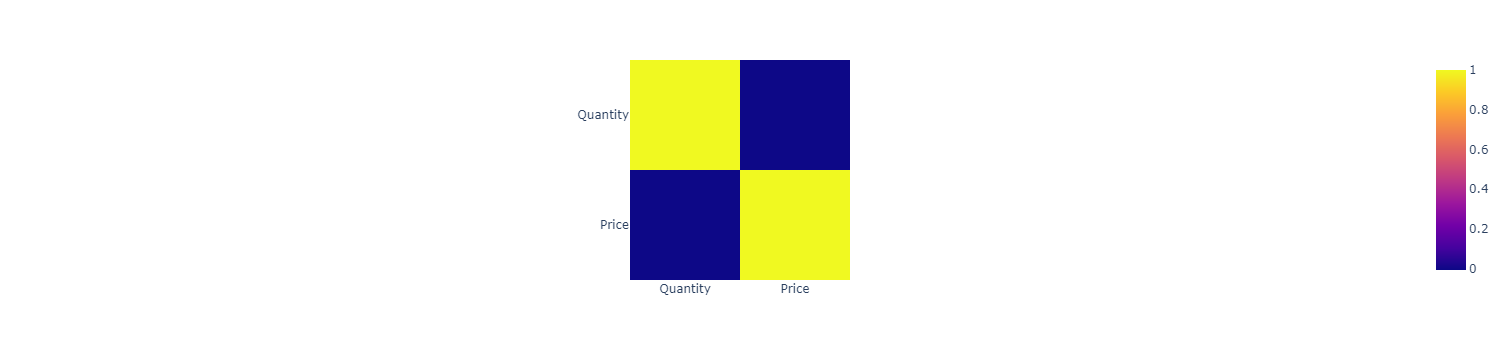

## Missing Matrix:

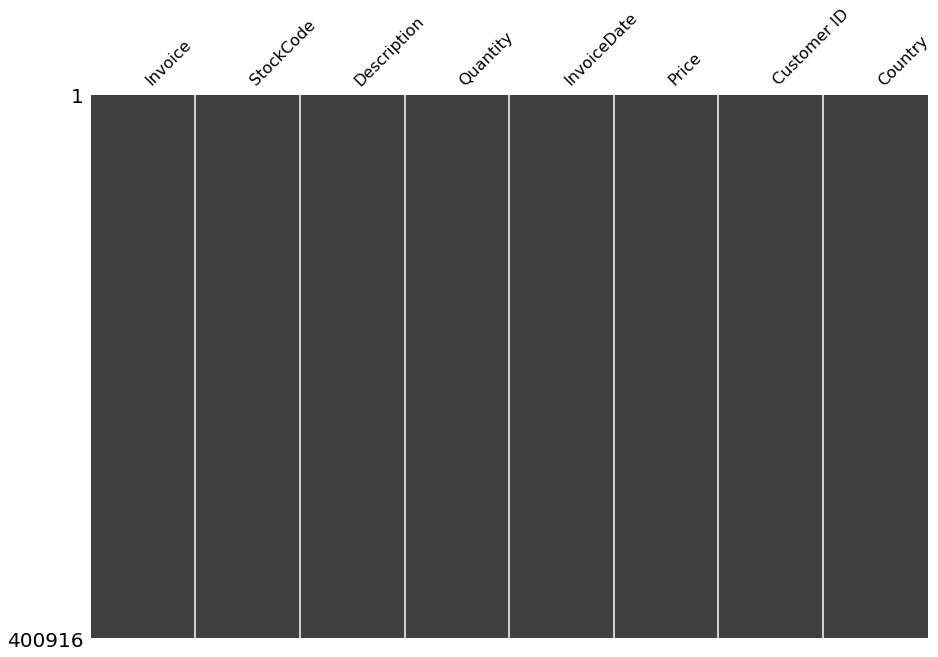

In [19]:
#Analisis bivariado
profile_df(df_retail_clean)

Dada la eliminación de los valores negativos y zeros, se aprecia cómo los gráficos bivariados se ajustan y se puede apreciar de mejor manera dónde se concentran los datos.
La correlación entre Price y Quantity no cambia mucho, sigue siendo negativa, pero ahora de -0.006. Finalmente, en la matriz de datos faltantes ya no se aprecian los valores nulos que destacaban en Costumer ID.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [27]:
df_retail_clean["Ingresos Generados"] = df_retail_clean["Price"]*df_retail_clean["Quantity"]

top_30 = df_retail_clean[["Description","Ingresos Generados"]].groupby("Description").sum().sort_values("Ingresos Generados",ascending=False).reset_index(drop=False)[0:30]

top_30

Description  Ingresos Generados
0    WHITE HANGING HEART T-LIGHT HOLDER           151339.16
1              REGENCY CAKESTAND 3 TIER           143727.60
2                                Manual            98531.99
3         ASSORTED COLOUR BIRD ORNAMENT            70291.03
4               JUMBO BAG RED RETROSPOT            51644.25
5                               POSTAGE            48741.08
6   ROTATING SILVER ANGELS T-LIGHT HLDR            40156.05
7       PAPER CHAIN KIT 50'S CHRISTMAS             36871.55
8                         PARTY BUNTING            35017.30
9             EDWARDIAN PARASOL NATURAL            34044.75
10                 JUMBO BAG STRAWBERRY            33926.25
11           VINTAGE UNION JACK BUNTING            33750.96
12              EDWARDIAN PARASOL BLACK            31183.85
13              CREAM HEART CARD HOLDER            29888.02
14       STRAWBERRY CERAMIC TRINKET BOX            29694.86
15       JUMBO  BAG BAROQUE BLACK WHITE            29349.00
16         VINTAGE UNION JACK MEMOBOARD            28746.54
17             BLACK RECORD COVER FRAME            28129.89
18             HOME BUILDING BLOCK WORD            28028.30
19     SET/5 RED SPOTTY LID GLASS BOWLS            27778.90
20     RED HANGING HEART T-LIGHT HOLDER            27300.61
21                 LUNCH BAG RED SPOTTY            26947.60
22               JUMBO STORAGE BAG SUKI            26443.40
23             RED RETROSPOT CAKE STAND            26374.19
24                        CHILLI LIGHTS            26262.68
25    WOOD BLACK BOARD ANT WHITE FINISH            26035.08
26    JUMBO SHOPPER VINTAGE RED PAISLEY            25542.15
27       JUMBO BAG PINK VINTAGE PAISLEY            25422.70
28    COLOUR GLASS. STAR T-LIGHT HOLDER            24965.75
29      JUMBO BAG PINK WITH WHITE SPOTS            24450.60

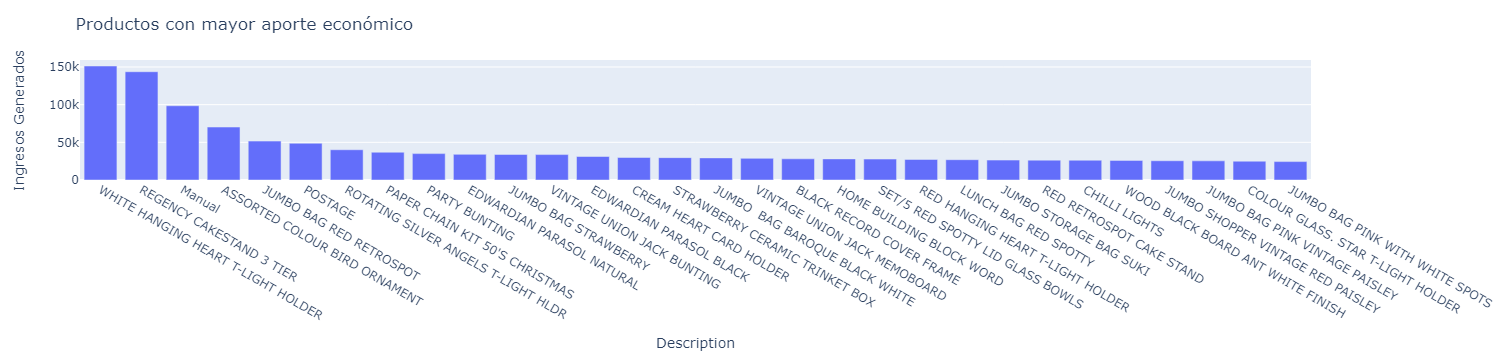

In [28]:
# Grafico
fig = px.bar(top_30, x="Description", y="Ingresos Generados")
fig.update_layout(
    title="Productos con mayor aporte económico")
fig.show()

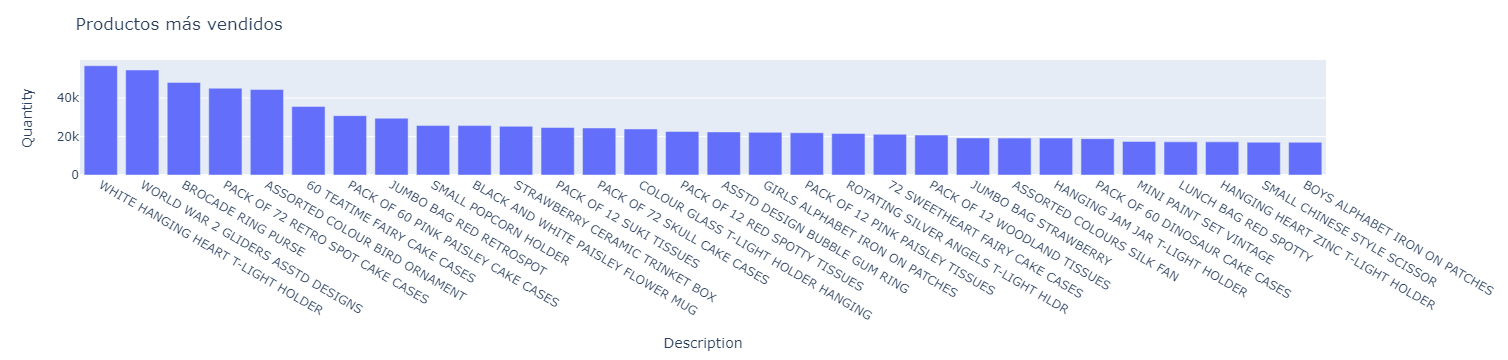

In [31]:
mas_vendidos = df_retail_clean[["Description","Quantity"]].groupby("Description").sum().sort_values("Quantity",ascending=False).reset_index(drop=False)[0:30]
# Grafico
fig = px.bar(mas_vendidos, x="Description", y="Quantity")
fig.update_layout(
    title="Productos más vendidos")
fig.show()

     El producto más vendido es también el producto que más ganancias genera. El resto de los que deja más ganancias son más caros por lo que algunos, como el segundo que más ingresos deja, ni siquiera aparece en el top 30 de los más vendidos.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [32]:
def plot_ventas(dataframe):
    ''' recibe el dataframe y devuelve gráfico con las ventas '''
    
    df = dataframe.copy()
    df["año-mes-día"]=df["InvoiceDate"].apply(lambda x: x.strftime("%Y/%m/%d"))
    
    ventas = df[["año-mes-día", "Ingresos Generados"]].groupby("año-mes-día").sum().reset_index(drop=False)
    
    fig = px.line(ventas, x="año-mes-día", y="Ingresos Generados", title="Registro temporal de las ventas")
    return fig.show()

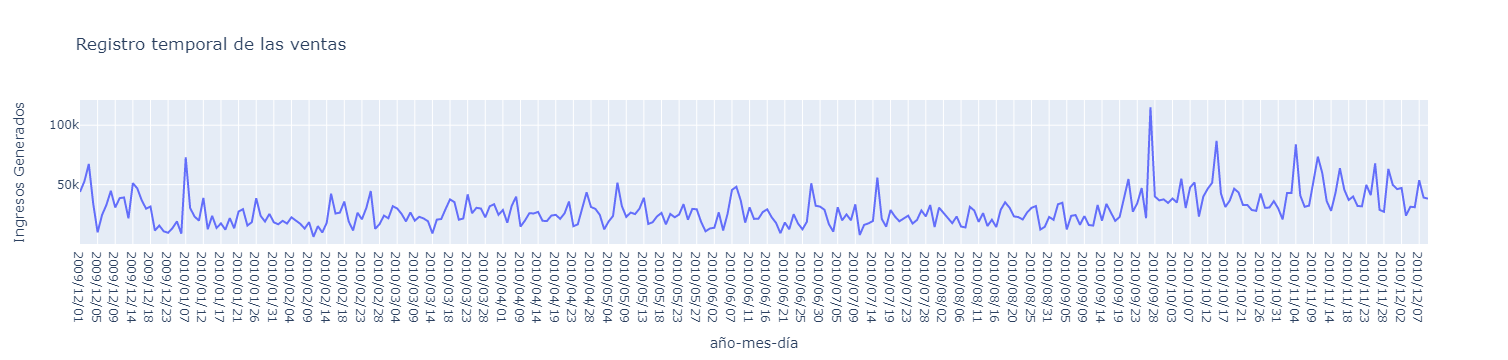

In [33]:
plot_ventas(df_retail_clean)

    Hasta el 23/09/2010 se ve que la curva se mueve más o menos hasta 50 mil, con 3 o 4 picos sobre este valor. Pasado este periodo se aprecia un aumento en las ventas consuderable, donde se aprecia incluso un pico de 115 mil y lo mínimos están sobre los 20 mil.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>